Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 07: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, January 11, 2022**. Therefore, the sheet is a bit longer and you can get a total of 26 points. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Expectation and Variance) [0 Points] 

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between mean and expectated value? How to compute it?

YOUR ANSWER HERE

**b)** What is the variance? What does it express? Why is there a square in the formula?

YOUR ANSWER HERE

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

## Exercise 1: Understanding Fourier Transform [7 points]

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

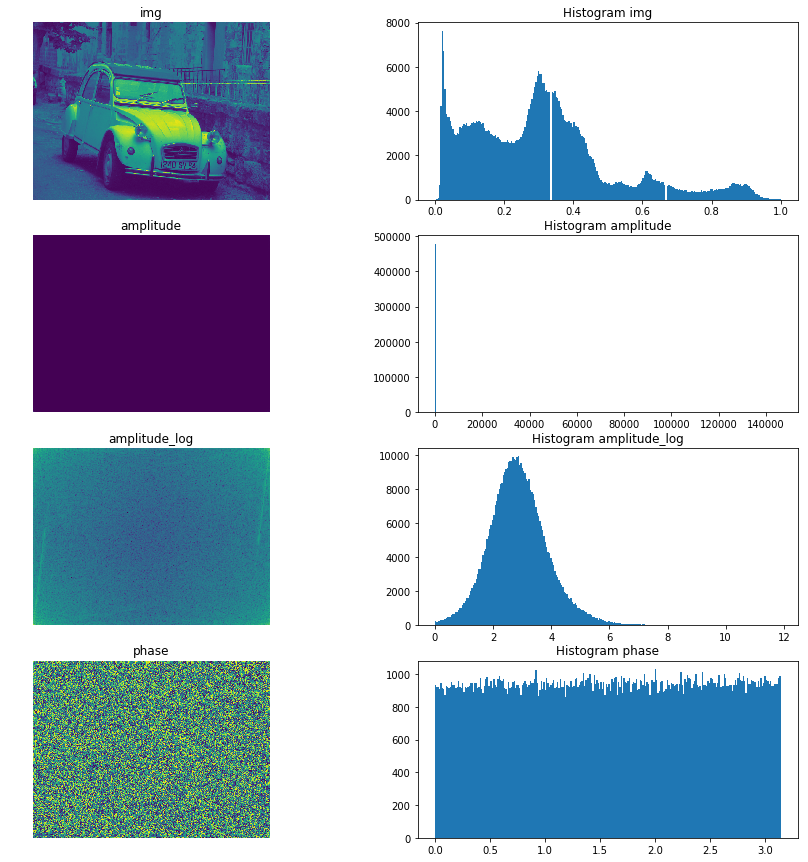

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

freq_space = np.fft.fft2(img)

amplitude = np.abs(freq_space)
amplitude_log = np.log(amplitude)

phase = np.angle(freq_space)

plt.figure(figsize=(15, 15))
plt.subplot(4,2,1); plt.axis('off'); plt.imshow(img); plt.title('img')
plt.subplot(4,2,2); plt.hist(img.flatten(), 255, (0, img.max())); plt.title('Histogram img' )

plt.subplot(4,2,3); plt.axis('off'); plt.imshow(amplitude); plt.title('amplitude')
plt.subplot(4,2,4); plt.hist(amplitude.flatten(), 255, (0, amplitude.max())); plt.title('Histogram amplitude' )

plt.subplot(4,2,5); plt.axis('off'); plt.imshow(amplitude_log); plt.title('amplitude_log')
plt.subplot(4,2,6); plt.hist(amplitude_log.flatten(), 255, (0, amplitude_log.max())); plt.title('Histogram amplitude_log' )

plt.subplot(4,2,7); plt.axis('off'); plt.imshow(phase); plt.title('phase')
plt.subplot(4,2,8); plt.hist(phase.flatten(), 255, (0, phase.max())); plt.title('Histogram phase' )

plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-09, slide 33.

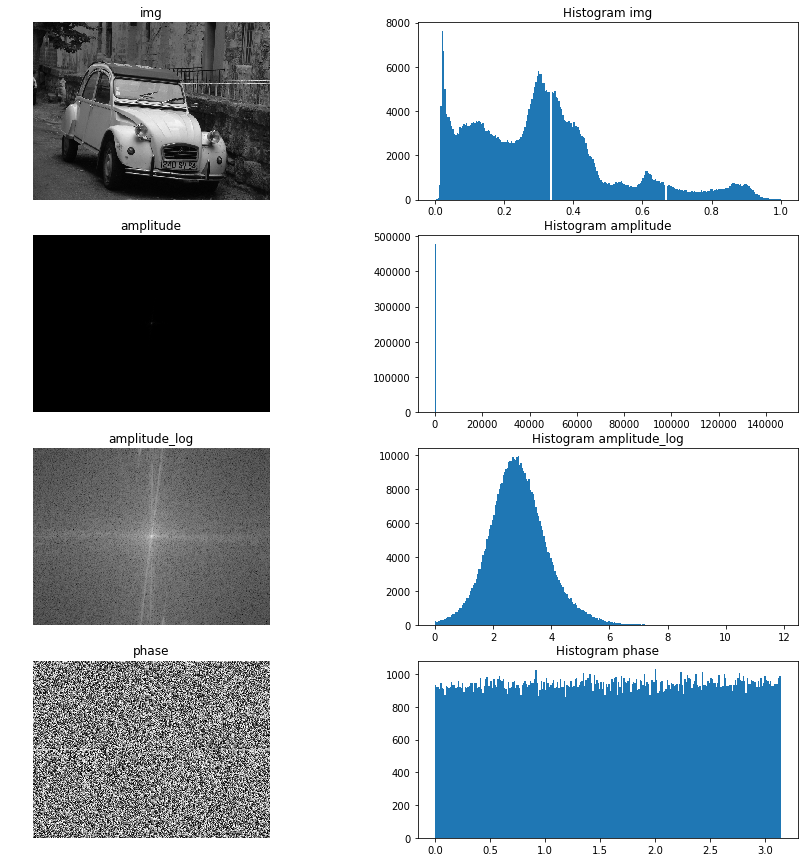

In [137]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

freq_space = np.fft.fft2(img)
freq_space = np.fft.fftshift(freq_space)

amplitude = np.abs(freq_space)
amplitude_log = np.log(amplitude)

phase = np.angle(freq_space)

plt.figure(figsize=(15, 15))
plt.subplot(4,2,1); plt.axis('off'); plt.imshow(img); plt.title('img')
plt.subplot(4,2,2); plt.hist(img.flatten(), 255, (0, img.max())); plt.title('Histogram img' )

plt.subplot(4,2,3); plt.axis('off'); plt.imshow(amplitude); plt.title('amplitude')
plt.subplot(4,2,4); plt.hist(amplitude.flatten(), 255, (0, amplitude.max())); plt.title('Histogram amplitude' )

plt.subplot(4,2,5); plt.axis('off'); plt.imshow(amplitude_log); plt.title('amplitude_log')
plt.subplot(4,2,6); plt.hist(amplitude_log.flatten(), 255, (0, amplitude_log.max())); plt.title('Histogram amplitude_log' )

plt.subplot(4,2,7); plt.axis('off'); plt.imshow(phase); plt.title('phase')
plt.subplot(4,2,8); plt.hist(phase.flatten(), 255, (0, phase.max())); plt.title('Histogram phase' )

plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

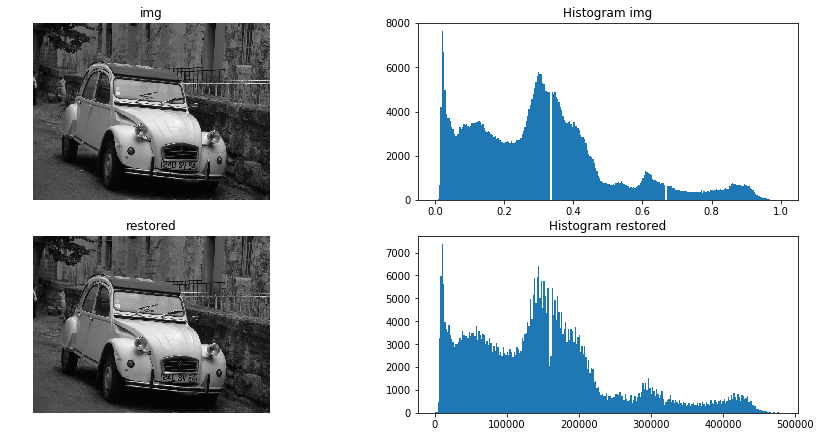

In [140]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

freq_space = np.fft.fft2(img)
freq_space = np.fft.fftshift(freq_space)

restored = np.fft.ifftshift(freq_space)
restored = np.fft.fft2(restored)
restored = np.abs(restored)
restored = np.flip(np.flip(restored, 0), 1)


plt.figure(figsize=(15, 15))
plt.subplot(4,2,1); plt.axis('off'); plt.imshow(img); plt.title('img')
plt.subplot(4,2,2); plt.hist(img.flatten(), 255, (0, img.max())); plt.title('Histogram img' )

plt.subplot(4,2,3); plt.axis('off'); plt.imshow(restored); plt.title('restored')
plt.subplot(4,2,4); plt.hist(restored.flatten(), 255, (0, restored.max())); plt.title('Histogram restored' )

plt.show()

The restored histogram seems "spikier" and less smooth, potentially due to less data being spread across the same histogram.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

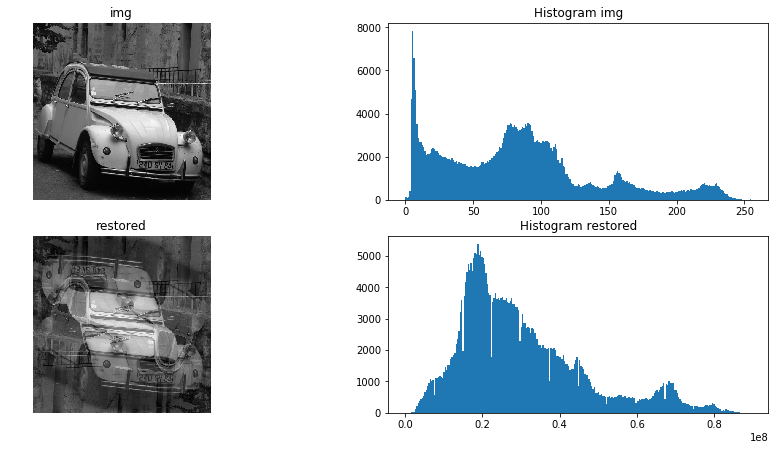

In [147]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')

freq_space = np.fft.fft2(img)
freq_space = np.fft.fftshift(freq_space)

phase_value = np.pi*2

phases = np.full_like(np.angle(freq_space), phase_value)

freq_space.imag = phases

restored = np.fft.ifftshift(freq_space)
restored = np.fft.fft2(restored)
restored = np.abs(restored)


plt.figure(figsize=(15, 15))
plt.subplot(4,2,1); plt.axis('off'); plt.imshow(img); plt.title('img')
plt.subplot(4,2,2); plt.hist(img.flatten(), 255, (0, img.max())); plt.title('Histogram img' )

plt.subplot(4,2,3); plt.axis('off'); plt.imshow(restored); plt.title('restored')
plt.subplot(4,2,4); plt.hist(restored.flatten(), 255, (0, restored.max())); plt.title('Histogram restored' )
plt.show()

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


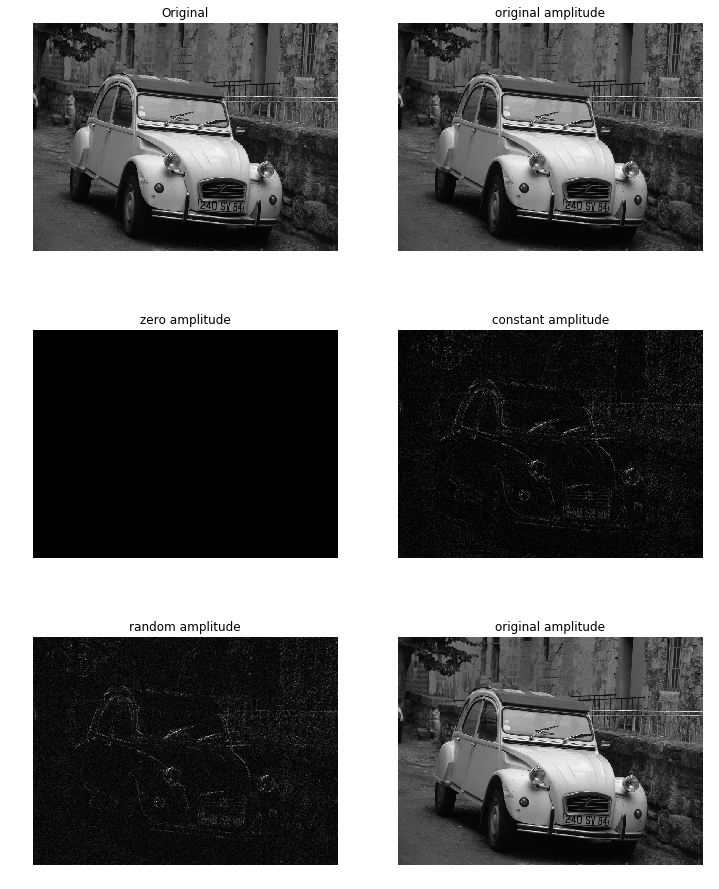

In [136]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

YOUR ANSWER HERE

## Exercise 2: Implementing Fourier Transform [6 points]

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

The fourier transform is a method by which a complicated function may be broken down in to its parts. A salient example is soundwaves. A fourier transform can be applied to the soundwaves that a microphone pics up when it hears a guitar play a chord, and break it down in to the indivual notes being played. 

The frequency space is the space in which analysis of mathematical functions in regards to their frequency (whilst not considering how these functions vary over time) is conducted.

A point in frequency space is 

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

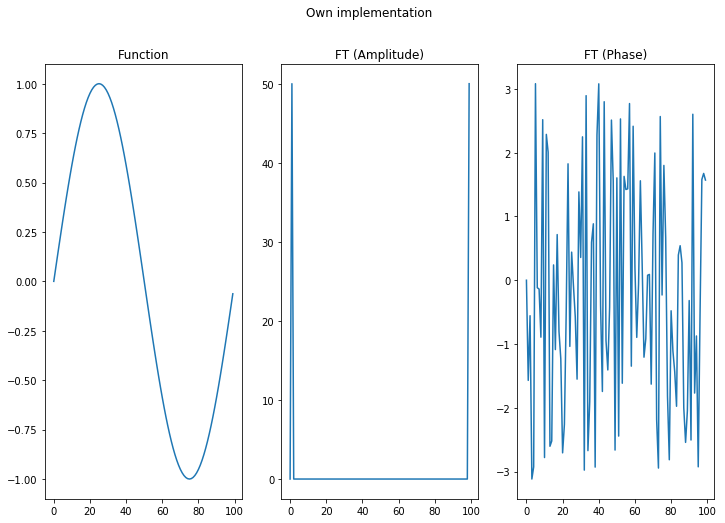

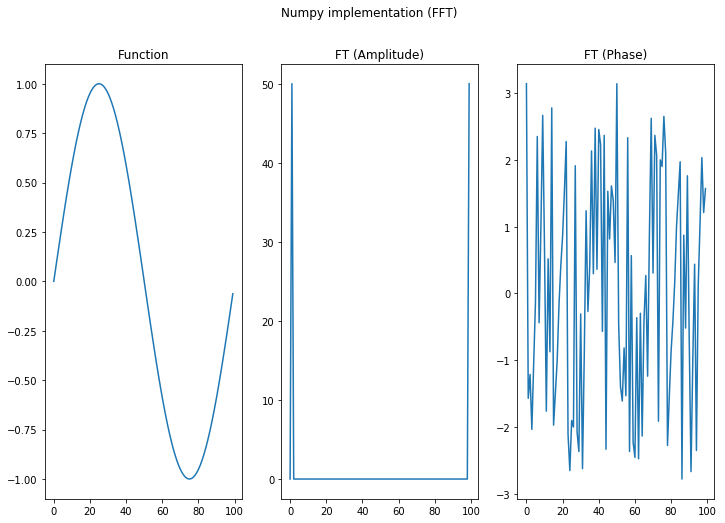

In [66]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    ft = np.zeros(func.shape, dtype=complex)

    for n in L:
        res = 0
        for x in range(len(func)):
            res += func[x] * np.exp(-2.j * np.pi * n * x / len(func))
        ft[n] = res
    
    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

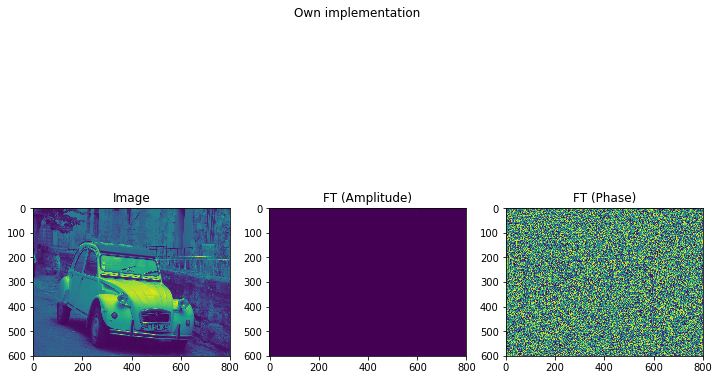

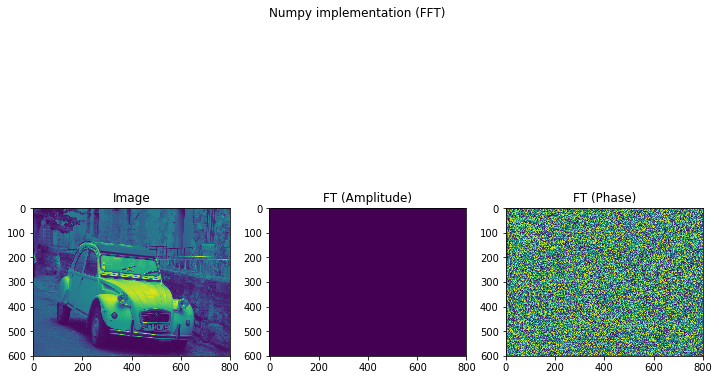

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def matrix_fourier2d(input_img):
    M, N = input_img.shape
    t = np.zeros((M,N), dtype=complex)
    output_img = np.zeros((M,N), dtype=complex)
    m = np.arange(M)
    n = np.arange(N)
    x = m.reshape((M,1))
    y = n.reshape((N,1))
    for row in range(M):
        M1 = 1j*np.sin(-2*np.pi*y*n/M) + np.cos(-2*np.pi*y*n/M)
        t[row] = np.dot(M1, input_img[row])
    for col in range(N):
        M2 = 1j*np.sin(-2*np.pi*x*m/M) + np.cos(-2*np.pi*x*m/M)
        output_img[:,col] = np.dot(M2, t[:,col])
    return output_img

def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
    
    """

    ft = np.zeros(img.shape, dtype=complex)

    M, N = img.shape
    
    for m in range(M):
        for n in range(N):
            for x in range(M):
                for y in range(N):
                    ft[m][n] += img[x][y] * np.exp(-2j * np.pi * (m * x / M + n * y / N))

    return ft


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')

# Own implementation.
ft = matrix_fourier2d(img)

plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.imshow(img); plt.title('Image')
plt.subplot(1, 3, 2); plt.imshow(np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.imshow(np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft2(img)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.imshow(img); plt.title('Image')
plt.subplot(1, 3, 2); plt.imshow(np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.imshow(np.angle(ft)); plt.title('FT (Phase)')
plt.show()

## Exercise 3: Convolution theorem [7 points]

**a)** What does the convolution theorem state and what are its practical consequences?

The idea behind convolution theorum is that convolution in a specifc domain, is the same as point-wise multiplication in another. Put another way, convolution in time domain equals multiplication in frequency domain, and vise versa.

The practical consequence of this is that with convolution theorem it is suddenly very easy to compute convolutions, as one may simply use the fourier transform and point-wise multiplication.

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

Periodic continuation.

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


A convolution, if you applied in Fourier space,becomes a product, so you can express the operation 𝐼∗𝑚 (𝐼 being the image, 𝑚 being the mask with which you filter) as 𝐼∗𝑚=𝐹−1(𝐹(𝐼)⋅𝐹(𝑚)) (where 𝐹 is the Fourier transform). This will cost 𝑂(𝑀𝑁log(𝑀𝑁)) operations.

Whether this is cheaper than what you have depends on the size of your filter mask: For small filters, a direct application is cheaper, but if the filter applies the mask over an area that is a significant subset of the image, then the Fourier transform may become cheaper.

**d)** Proof the convolution theorem.

YOUR ANSWER HERE

## Exercise 4: Filter design and frequency space[6 points]

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the the kernel size. What do you observe?

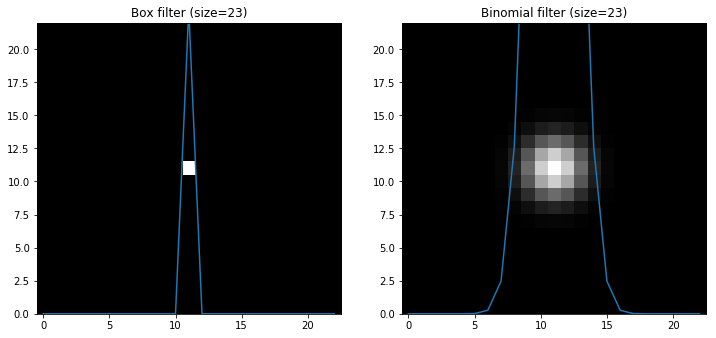

In [128]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

kernel_size = 23 # vary this

# compute the kernels

# Box filter
factor = 1 / (kernel_size ** 2)
box_kernel =  factor * np.ones((kernel_size, kernel_size))

# Binomial filter
factor = 1 / (4 ** (kernel_size - 1))
binomial_vector = np.array([binom(kernel_size, column) for column in range(kernel_size)])
# 2D binomial filter with prefactor
binomial_kernel = factor * binomial_vector * binomial_vector.reshape(kernel_size, 1)

box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))
# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(kernel_size), np.abs(box_frequencies)[kernel_size//2]*kernel_size)
plt.ylim(0, kernel_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(kernel_size), np.abs(binomial_frequencies)[kernel_size//2]*kernel_size)
plt.ylim(0, kernel_size-1)
plt.show()

The range of values that the binomial filter takes is always much larger than that of the box filter (the same order of magnitude, but still several times larger.

**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_\max$. What do you observe? Explain that observation and discuss how to improve the result.

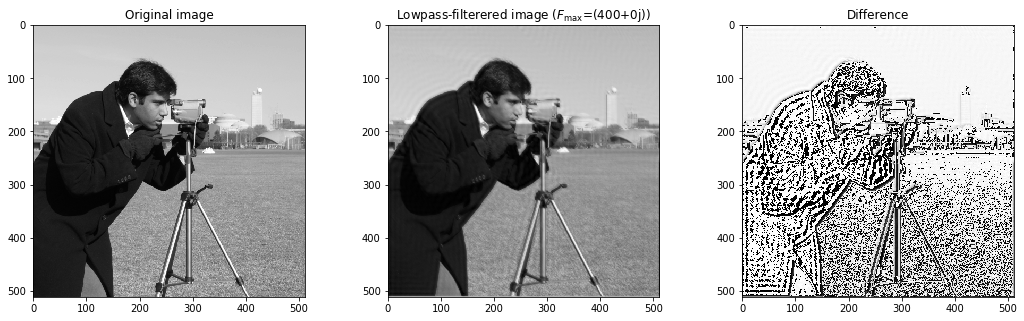

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

image = imageio.imread('imageio:camera.png')

def low_pass_filter(image, f_max):
    # computes the n-dimensional discrete Fourier transform
    ft = np.fft.fft2(image)
    ft = np.fft.fftshift(ft)


    M,N = ft.shape
    for u in range(M):
        for v in range(N):
            # Filter design: slide 60
            if u.real**2 + v.real**2 > f_max.real**2:
                ft[u][v] = 0.0

    # apply FT to the resulting FT img
    restored = np.fft.ifftshift(ft)
    restored = np.fft.fft2(ft)
    restored = np.abs(restored)
    restored = np.flip(np.flip(restored, 1), 0)
    result = restored * (255.0 / restored.max())
    return result.astype(np.uint8)

f_max = 400 + 0j
filtered_image = low_pass_filter(image, f_max=f_max)

# plot kernel in frequency space
plt.figure(figsize=(18,5))
plt.subplot(1,3,1); plt.title(f"Original image")
plt.imshow(image) 
plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
plt.imshow(filtered_image)
plt.subplot(1,3,3); plt.title(f"Difference")
plt.imshow(filtered_image-image)
plt.show()

Low pass filters introduce banding to the image. 

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

The generally accepted wisdom is three times the sie of the standard deviation. This is because gaussian distributions have essentially zero values beyond three standard deviations.

**d)** Describe impulse ("salt and pepper") noise and explain what kind of filter should be used to remove such noise.

Salt and pepper noise is a type of image noise that usually arises from a sudden or sharp disturbance in the image signal. It appears as randomly distributed pixels on a grey scale image that are completely black or white. A median filter is often a good solution for salt and pepper noise.

## Exercise 5: Applying Fourier Transform [Bonus]

If you solve this exercise you may leave out one of the other exercises.


**a)** In order to apply the Custom Structuring Element to our satelite image in Assignment 4 of Sheet 3 we had to rotate the image. We had to measure the rotation angle by hand. We can now do this automatically via Fourier Transform.

1. Apply Fourier transform to the `img_gray`. The resulting amplitude should show the angle of the black lines.

1. Try to automatically get the rotation angle from the Fourier space. There are different ways to achieve this.
   Hints:
   * You may threshold the amplitudes, to only keep “relevant” values. You can then compute the angle of the largest relevant value.
   * Alternatively, you may apply methods you know from other lectures to get the main component and compute its angle.

1. Rotate the image back to its originally intended orientation (`skimage.transform.rotate`).

In [ ]:
%matplotlib inline
import numpy as np
from skimage import color
from skimage.transform import hough_line
from skimage.transform import rotate
import matplotlib.pyplot as plt

img = plt.imread('images/landsat_stack2.png')
img_gray = color.rgb2gray(img)

# YOUR CODE HERE

plt.show()

**b)** Can you think of other applications of Fourier Transform in Computer Vision?

YOUR ANSWER HERE